In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import pickle

2022-12-22 09:33:02.984474: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-22 09:33:03.372935: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-22 09:33:04.911476: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-22 09:33:04.911730: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such 

In [2]:
with open('features_encoder_pictures_with_no_buildings_last_version.pkl','rb') as f:
    features = pickle.load(f)
features.shape

(10881, 16, 16, 128)

In [3]:
features = features.reshape(features.shape[0], features.shape[1]* features.shape[2]* features.shape[3])
features.shape

(10881, 32768)

In [4]:
from sklearn.cluster import Birch
birch = Birch(n_clusters=100)
predictions = birch.fit_predict(features)
predictions

array([82, 32, 35, ..., 21, 61, 40])

In [5]:
# with open('predictions.pkl','wb') as f:
#     pickle.dump(predictions, f)

In [6]:
img_folder = "../tripadvisor_dataset/tripadvisor_images_small/"
image_files=os.listdir(img_folder)


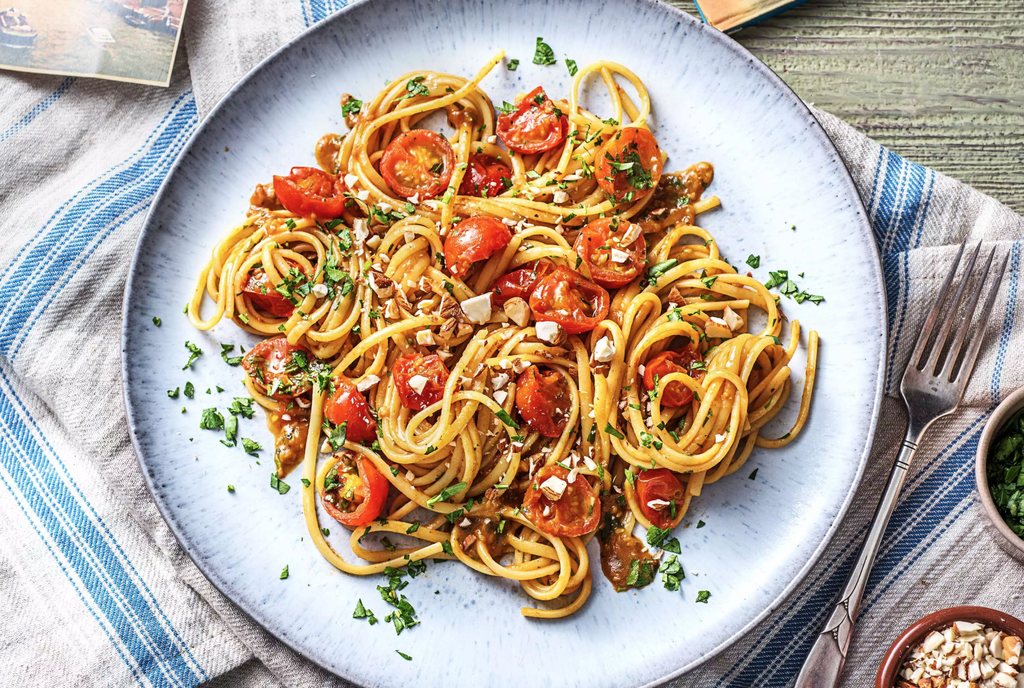

In [7]:
from fastai.vision.all import PILImage
img = PILImage.create('../pasta.png')
img

In [8]:
IMG_HEIGHT = 128
IMG_WIDTH = 128

img_resized = img.resize((IMG_HEIGHT,IMG_WIDTH))
img_resized = np.array(img_resized)
img_resized.shape


(128, 128, 3)

In [9]:
img_resized_model = img_resized.reshape(1, IMG_HEIGHT, IMG_WIDTH, 3)

In [11]:
model = keras.models.load_model("./model_last_version")
results = model.predict(img_resized_model)
results = results.reshape(results.shape[0], results.shape[1]* results.shape[2]* results.shape[3])
results.shape

2022-12-22 10:31:49.542424: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-22 10:31:50.627345: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10405 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:b0:00.0, compute capability: 6.1


2022-12-22 10:31:53.226560: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500


1/1 [==============================] - 3s 3s/step


(1, 32768)

In [12]:
pasta_cluster = birch.predict(results)
pasta_cluster

array([67])

In [13]:
indices = np.where(predictions == pasta_cluster)[0]
print(len(indices))
file_names = [image_files[i] for i in list(indices)]
unique_restaurants = set()
for file in file_names:
    unique_restaurants.add(int(file.split("_")[0]))
unique_restaurants

88


{740645,
 740664,
 740695,
 740708,
 740802,
 784380,
 896603,
 1143981,
 1179020,
 1179069,
 1592412,
 1895959,
 2163268,
 2232741,
 2385392,
 3174943,
 3368355,
 3443862,
 3457241,
 3589043,
 3602096,
 3785414,
 3819823,
 4026066,
 4197484,
 4371500,
 4510013,
 4542201,
 5500931,
 5813529,
 6022514,
 6380688,
 6920678,
 7045750,
 7154403,
 7240054,
 7243474,
 7246379,
 7253996,
 7695538,
 7989928,
 8025230,
 8319700,
 8462977,
 8495013,
 8594246,
 10027323,
 10041401,
 10062100,
 10173853,
 10469486,
 10644250,
 10661664,
 10730255,
 10830257,
 11797609,
 12007215,
 12300282,
 12606150,
 12850619,
 12883299,
 13432522,
 13473197,
 13479805,
 13523455,
 14013341,
 14990372,
 18153830,
 18453187,
 18455497,
 18542716,
 18543205,
 19383824,
 19853784,
 20159380,
 20938371,
 20996099,
 21022432,
 21053410,
 21058987,
 21092655,
 23222867,
 23744059,
 23938101,
 23954909,
 24889503}

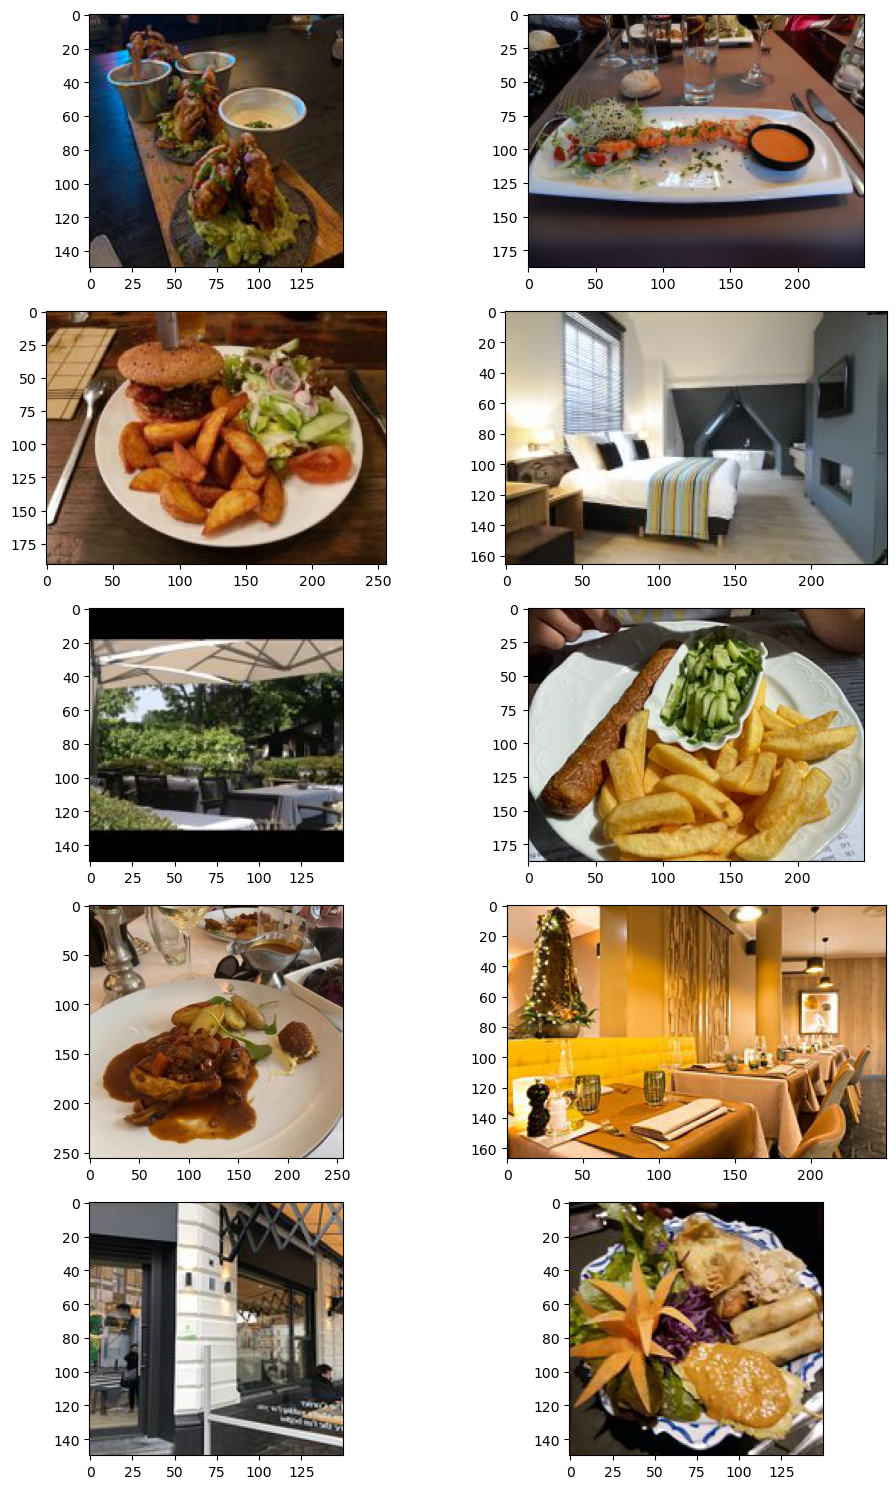

In [14]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,15))

for i in range(0,10):
    plt.subplot(5,2,i+1)
    img = PILImage.create(img_folder + '/' + file_names[i])
    # restaurant name get be obtained in file_names[i]
    plt.imshow(img)
fig.tight_layout()
plt.show()

## K means

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100)
predictions = kmeans.fit_predict(features)
predictions

array([30, 85, 41, ..., 52, 33, 30], dtype=int32)

The method process_image does the same as the code cells above applied on Birch but in a compact manner.

In [16]:
def process_image(predictions, cluster_model):
    img_folder = "../tripadvisor_dataset/tripadvisor_images_small/"
    image_files=os.listdir(img_folder)
    img = PILImage.create('../pasta.png')
    IMG_HEIGHT = 128
    IMG_WIDTH = 128

    img_resized = img.resize((IMG_HEIGHT,IMG_WIDTH))
    img_resized = np.array(img_resized)
    img_resized_model = img_resized.reshape(1, IMG_HEIGHT, IMG_WIDTH, 3)

    model = keras.models.load_model("./model_last_version")
    results = model.predict(img_resized_model)
    results = results.reshape(results.shape[0], results.shape[1]* results.shape[2]* results.shape[3])

    pasta_cluster = cluster_model.predict(results)
    indices = np.where(predictions == pasta_cluster)[0]
    print(len(indices))

    file_names = [image_files[i] for i in list(indices)]
    unique_restaurants = set()
    for file in file_names:
        unique_restaurants.add(int(file.split("_")[0]))
    print(unique_restaurants)

    fig=plt.figure(figsize=(10,15))
    for i in range(0,10):
        plt.subplot(5,2,i+1)
        img = PILImage.create(img_folder + '/' + file_names[i])
        # restaurant name get be obtained in file_names[i]
        plt.imshow(img)
    fig.tight_layout()
    plt.show()
    return unique_restaurants

1/1 [==============================] - 0s 125ms/step
49
{23819264, 740613, 2196877, 694671, 8451088, 3847454, 4557048, 7726497, 3589154, 12273827, 10131620, 7828141, 3602096, 740657, 11803061, 1179193, 8494267, 4553022, 7742785, 4971969, 4993603, 15058628, 7194566, 816070, 8733128, 15011401, 4371274, 13432522, 740682, 8744781, 20988878, 1223250, 13799895, 1536347, 12686684, 4225501, 12367843, 7154403, 10622693, 6351089, 12972530, 7285489, 12559476, 23641205, 9869041, 13847543, 1054072, 8486394, 10299899}


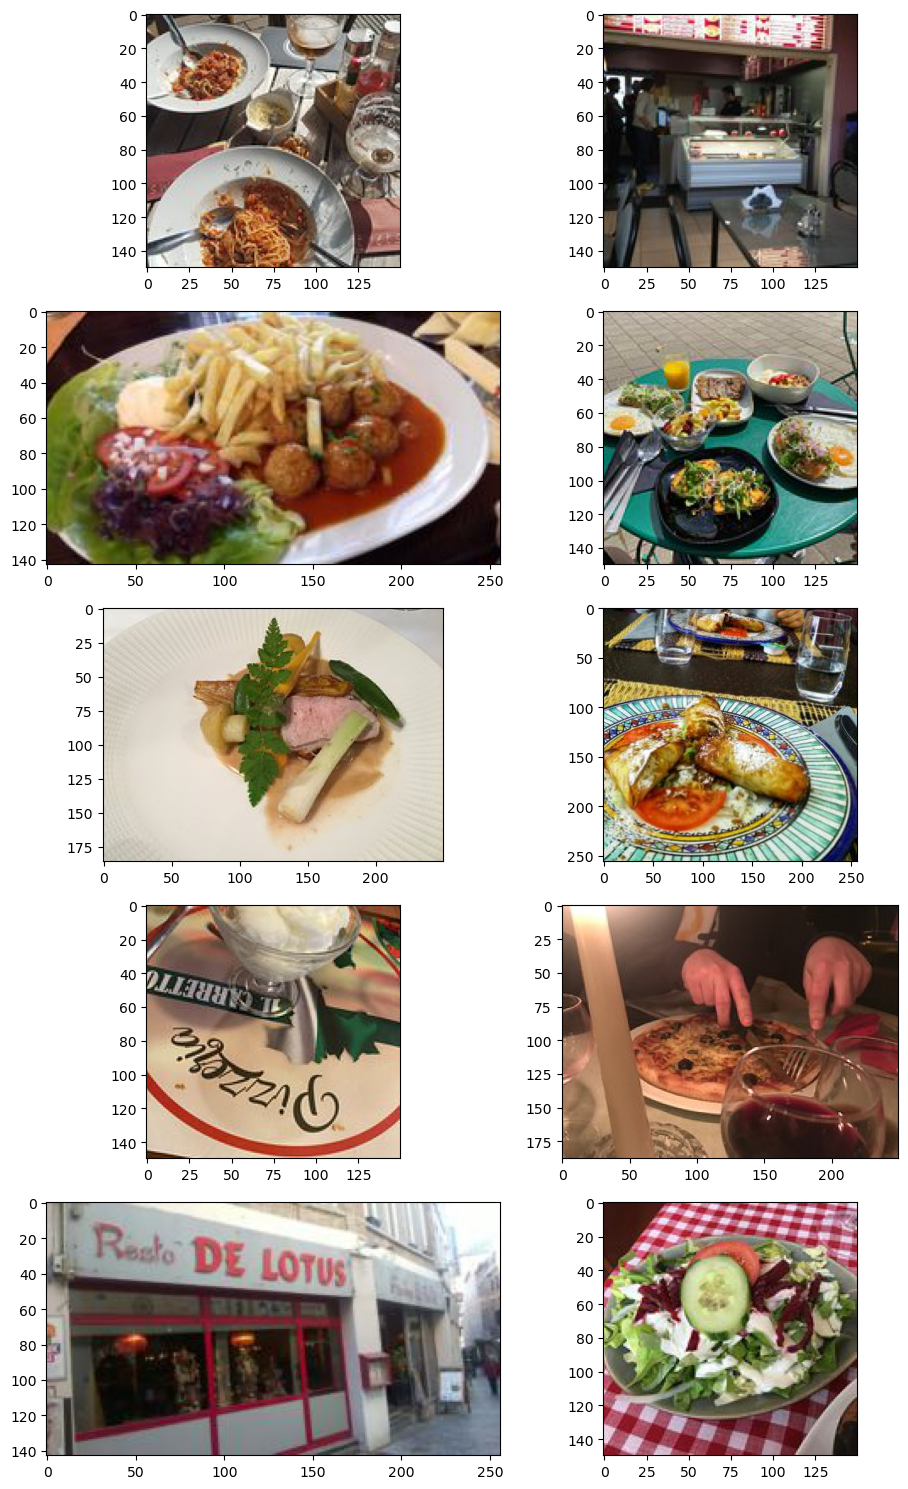

In [17]:
restaurants = process_image(predictions, kmeans)